In [2]:
import awkward as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import vector
import mplhep as hep
import Analyzer as an
import glob

hep.style.use("CMS")

from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents import NanoAODSchema, DelphesSchema

In [3]:
signal_tag = 'tau'

if signal_tag == 'tau':
    signal_1TeV = pd.read_parquet('/home/tomas/cernbox/Signal_optimization/muestras/Signal_tau_1tev.parquet')
    signal_name_1TeV = "Signal_tau_1tev"
    signal_600GeV = pd.read_parquet('/home/tomas/cernbox/Signal_optimization/muestras/Signal_tau_600gev.parquet')
    signal_name_600GeV = "Signal_tau_600gev"
elif signal_tag == 'ele':
    signal_600GeV  = pd.read_parquet('/home/tomas/cernbox/Signal_optimization/muestras/SignalElectron_600GeV.parquet')
    signal_name_600GeV = "SignalElectron_600GeV"
    signal_1TeV = pd.read_parquet('/home/tomas/cernbox/Signal_optimization/muestras/SignalElectron_1TeV.parquet')
    signal_name_1TeV = "SignalElectron_1TeV"

signal_1TeV.head()

,electron_pt,electron_phi,electron_eta,electron_met_mt,met,met_phi,jet_pt,jet_eta,jet_phi,jet_mass
0,100.502480,0.156586,-1.972412,201.733128,152.607141,2.060192,136.62500,0.101074,-2.276855,12.812500
1,317.119324,2.981445,0.299133,500.101037,218.798160,0.479566,188.25000,0.885498,-0.793335,22.828125
2,285.153198,-0.968018,-0.648560,416.250696,152.881456,2.013556,36.03125,1.489502,0.002188,7.242188
3,137.263840,1.325928,-2.302734,342.259060,253.861267,-2.637547,36.37500,0.755249,-1.313232,5.414062
4,206.330521,2.708984,-1.644531,415.095519,212.688969,-0.160360,98.06250,-2.226074,-2.574707,13.992188


In [4]:
events = pd.DataFrame(pd.read_parquet(glob.glob("/home/tomas/cernbox/Signal_optimization/info_muestras/*.parquet")))
events = events.sort_values(by = 'fileset')
events = events.set_index('fileset')
events.index.name = None
events.drop(index = ["ST_t-channel_antitop_4f_InclusiveDecays", "ST_t-channel_top_4f_InclusiveDecays"],
            inplace = True ) #.sort_values(by = )

In [5]:
lumi = 41.5
XSECS = {
    "SignalElectron_1TeV": 5.23668126,
    "SignalElectron_600GeV": 29.6877596,
    "Signal_tau_1tev" : 5.23668126,
    "Signal_tau_600gev" : 29.6877596,
    "TTTo2L2Nu": 88.29,
    "TTToHadronic": 377.96,
    "TTToSemiLeptonic": 365.34,
    "ST_s-channel_4f_leptonDecays": 3.549,
    "ST_t-channel_antitop_5f_InclusiveDecays": 71.74,
    "ST_t-channel_top_5f_InclusiveDecays": 119.7,
    "ST_tW_antitop_5f_inclusiveDecays": 34.97,
    "ST_tW_top_5f_inclusiveDecays": 34.91,
    "WJetsToLNu_HT-100To200": 1395,
    "WJetsToLNu_HT-200To400": 407.9,
    "WJetsToLNu_HT-400To600": 57.48,
    "WJetsToLNu_HT-600To800": 12.87,
    "WJetsToLNu_HT-800To1200": 5.366,
    "WJetsToLNu_HT-1200To2500": 1.074,
    "WJetsToLNu_HT-2500ToInf": 0.008001,
    "DYJetsToLL_M-50_HT-100to200": 160.7,
    "DYJetsToLL_M-50_HT-200to400": 48.63,
    "DYJetsToLL_M-50_HT-400to600": 6.993,
    "DYJetsToLL_M-50_HT-600to800": 1.761,
    "DYJetsToLL_M-50_HT-800to1200": 0.8021,
    "DYJetsToLL_M-50_HT-1200to2500": 0.1937,
    "DYJetsToLL_M-50_HT-2500toInf": 0.003514,
    "WW": 75.95,
    "WZ": 27.59,
    "ZZ": 12.17 
}
x_sections = pd.Series(XSECS) * 1e-12
n_ev = x_sections * lumi / (1e-15)
n_mc = events.nevents_before
w = n_ev / n_mc

events['weights'] = w
events

,nevents_before,nevents_after,weights
DYJetsToLL_M-50_HT-100to200,20043136,41638,0.332735
DYJetsToLL_M-50_HT-1200to2500,4828418,85606,0.001665
DYJetsToLL_M-50_HT-200to400,12777715,47658,0.157943
DYJetsToLL_M-50_HT-2500toInf,1480047,44158,0.000099
DYJetsToLL_M-50_HT-400to600,6063222,38732,0.047864
DYJetsToLL_M-50_HT-600to800,5304434,47339,0.013777
DYJetsToLL_M-50_HT-800to1200,4960019,58909,0.006711
ST_s-channel_4f_leptonDecays,14162000,273504,0.010400
ST_t-channel_antitop_5f_InclusiveDecays,70074000,566053,0.042487
ST_t-channel_top_5f_InclusiveDecays,139712000,1091353,0.035556


In [6]:
backgrounds_info = events.copy()
backgrounds_info.drop(index = ["SignalElectron_1TeV",
                               "SignalElectron_600GeV",
                               "Signal_tau_1tev",
                               "Signal_tau_600gev"], inplace = True)
backgrounds_info['type'] = ["DY + Jets"] * 7 \
                         + ["SingleTop"] * 5 \
                         + [r"$t\bar{t}$"] * 3\
                         + ["W + Jets"] * 7\
                         + ["VV"] * 3
backgrounds_info['events_after_preselection'] = backgrounds_info['nevents_after'] * backgrounds_info['weights']
backgrounds_info

,nevents_before,nevents_after,weights,type,events_after_preselection
DYJetsToLL_M-50_HT-100to200,20043136,41638,0.332735,DY + Jets,13854.413995
DYJetsToLL_M-50_HT-1200to2500,4828418,85606,0.001665,DY + Jets,142.520410
DYJetsToLL_M-50_HT-200to400,12777715,47658,0.157943,DY + Jets,7527.226457
DYJetsToLL_M-50_HT-2500toInf,1480047,44158,0.000099,DY + Jets,4.350946
DYJetsToLL_M-50_HT-400to600,6063222,38732,0.047864,DY + Jets,1853.864885
DYJetsToLL_M-50_HT-600to800,5304434,47339,0.013777,DY + Jets,652.210043
DYJetsToLL_M-50_HT-800to1200,4960019,58909,0.006711,DY + Jets,395.343792
ST_s-channel_4f_leptonDecays,14162000,273504,0.010400,SingleTop,2844.416494
ST_t-channel_antitop_5f_InclusiveDecays,70074000,566053,0.042487,SingleTop,24049.699634
ST_t-channel_top_5f_InclusiveDecays,139712000,1091353,0.035556,SingleTop,38803.757695


In [7]:
backgrounds_info.groupby('type').sum()[['events_after_preselection']]

,events_after_preselection
type,
$t\bar{t}$,627879.493037
DY + Jets,24429.930528
SingleTop,129900.257253
VV,6316.907395
W + Jets,232262.306123


In [8]:
backgrounds = {}
for background in events.index:
    if background in ["SignalElectron_1TeV", "SignalElectron_600GeV", "Signal_tau_1tev", "Signal_tau_600gev"]:
        continue
    backgrounds[background] = pd.read_parquet(f"/home/tomas/cernbox/Signal_optimization/muestras/{background}.parquet")

backgrounds['WW'].head()

,electron_pt,electron_phi,electron_eta,electron_met_mt,met,met_phi,jet_pt,jet_eta,jet_phi,jet_mass
0,43.979813,1.654297,-1.031006,43.911101,87.023522,0.928694,85.875000,-0.966431,3.055176,11.773438
1,37.108898,-2.672363,0.711304,59.624808,112.606920,-1.713702,125.500000,-1.600098,1.314941,16.500000
2,55.819149,0.108734,2.149414,104.704293,53.595257,-2.445252,23.859375,1.542236,-2.857422,4.089844
3,39.566547,1.492920,1.371582,77.546564,59.677385,-0.354779,54.781250,-0.226746,-2.611816,6.667969
4,75.111137,-2.439453,-1.073486,47.425982,61.868925,3.133168,41.125000,-2.215332,-0.008762,10.562500


In [9]:
signal_1TeV["dphi_e_met"] = signal_1TeV.apply(an.DeltaPhi2, axis = 1, args = ('electron_phi', 'met_phi'))
signal_600GeV["dphi_e_met"] = signal_600GeV.apply(an.DeltaPhi2, axis = 1, args = ('electron_phi', 'met_phi'))

In [10]:
for background in backgrounds.keys():
    backgrounds[background]["dphi_e_met"] = backgrounds[background].apply(an.DeltaPhi2, axis = 1, \
                                                                          args = ('electron_phi', 'met_phi'))

In [11]:
def generate_histogram_variable(variable, 
                                factors = [1, 1],
                                signal_600 = signal_600GeV,
                                signal_1000 = signal_1TeV,
                                bkg_dict = backgrounds,
                                cut = False,
                                ratio = False):
    """
    This function generates a histogram plot for a given variable based on input data and parameters. 
    It calculates histograms for different backgrounds and signal samples, and combines them into a 
    stacked histogram plot. The function utilizes the hep.histplot function for plotting.

    Parameters:
        - variable (str): The variable for which the histogram is generated. Currently supported 
                          values are 'electron_pt', 'dphi_e_met', and 'met'.
        - factors (list, optional): Scaling factors for the signal samples. Default is [30, 30].
        - signal_600 (array-like, optional): Data for the signal sample at 600 GeV. Default is 
                          signal_600GeV.
        - signal_1000 (array-like, optional): Data for the signal sample at 1 TeV. Default is 
                          signal_1TeV.
        - bkg_dict (dict, optional): Dictionary containing background data. Default is backgrounds.
        - cut (bool, optional): Indicates whether cuts are applied to the data. Default is False.

    Example:
        generate_histogram_variable(variable = 'electron_pt', 
                                    factors = [10, 10],
                                    signal_600 = signal_600GeV_cut,
                                    signal_1000 = signal_1TeV_cut,
                                    bkg_dict = backgrounds_cut,
                                    cut = True)
    Returns:
        A matplotlib figure with the histograms for backgrounds stacked and 2 types of signals
    """


    # generates the bins and the counts for the histograms
    if variable == 'electron_pt':
        binning = [30, 60, 90, 120, 150, 180, 210, 240, 300, 500]
        histograma = {'DY + Jets': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
                      'SingleTop': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0]), 
                      '$t\\bar{t}$': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0]), 
                      'W + Jets': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
                      'VV': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])}
    elif variable == 'dphi_e_met':
        binning = np.linspace(0, 3.15, 30)
        histograma = {'DY + Jets': np.zeros(29),
                      'SingleTop': np.zeros(29), 
                      '$t\\bar{t}$': np.zeros(29), 
                      'W + Jets': np.zeros(29),
                      'VV': np.zeros(29)}
    elif variable == 'met':
        binning = [50, 75, 100, 125, 150, 175, 200, 300, 500]
        histograma = {'DY + Jets': np.zeros(8),
                      'SingleTop': np.zeros(8), 
                      '$t\\bar{t}$': np.zeros(8), 
                      'W + Jets': np.zeros(8),
                      'VV': np.zeros(8)}
    elif 'mass' in variable:
        binning = np.concatenate([np.arange(100, 701, 50), np.array([800, 1000])] )
        histograma = {'DY + Jets': np.zeros(14),
                      'SingleTop': np.zeros(14), 
                      '$t\\bar{t}$': np.zeros(14), 
                      'W + Jets': np.zeros(14),
                      'VV': np.zeros(14)}
    
            
    
    #Fill the values for the counts in the histogram
    for background in bkg_dict.keys():
        hist, bins = np.histogram(bkg_dict[background][variable], binning)
        type_bkg = backgrounds_info.loc[background, 'type']
        histograma[type_bkg] = histograma[type_bkg] + hist * backgrounds_info.loc[background,'weights']
        
    
    if signal_tag == 'ele':
        signal_1TeV_counts = np.histogram(signal_1000[variable], binning)[0] * events.loc['SignalElectron_1TeV', 'weights']
        signal_600GeV_counts = np.histogram(signal_600[variable], binning)[0] * events.loc['SignalElectron_1TeV', 'weights']
        labels = [r"$W'(m = 0.6TeV) \rightarrow e \nu$",
                  r"$W'(m = 1TeV) \rightarrow e \nu$" ]
        if factors[0] != 1:
            labels[0] = fr"$W'(m = 0.6TeV) \rightarrow e \nu \times { factors[0] }$"
        if factors[1] != 1:
            labels[1] = fr"$W'(m = 1TeV) \rightarrow e \nu \times { factors[1] }$"
            
    elif signal_tag == 'tau':
        signal_1TeV_counts = np.histogram(signal_1000[variable], binning)[0] * events.loc['Signal_tau_1tev', 'weights']
        signal_600GeV_counts = np.histogram(signal_600[variable], binning)[0] * events.loc['Signal_tau_600gev', 'weights']    
        labels = [r"$W'(m = 0.6TeV) \rightarrow \tau \rightarrow e \nu$",
                  r"$W'(m = 1TeV) \rightarrow \tau \rightarrow e \nu$" ]
        if factors[0] != 1:
            labels[0] = fr"$W'(m = 0.6TeV) \rightarrow \tau \rightarrow e \nu \times{ factors[0]}$"
        if factors[1] != 1:
            labels[1] = fr"$W'(m = 1TeV) \rightarrow \tau \rightarrow e \nu \times{ factors[1]}$"

    if variable == 'dphi_e_met':
        localization = 'upper center'
    else:
        localization = 'best'


    #If there is a ratio plot generates the 2 axes and uses the optimization function
    if ratio == False:
        f, axs = plt.subplots( figsize=(9, 7), tight_layout = True)
    else:
        fig, (axs, rax) = plt.subplots(nrows=2,
                                       ncols=1,
                                       figsize=(9, 10),
                                       tight_layout=True,
                                       gridspec_kw={"height_ratios": (5, 1)},
                                       sharex=True
        )
        if variable != 'dphi_e_met':
            sig_1TeV = an.optimization(signal_data = signal_1000,
                                       backgrounds_data = bkg_dict,
                                       weights = w,
                                       variable = variable,
                                       variable_range = [binning[0], binning[-1], 50],
                                       signal_name = signal_name_1TeV)
            sig_600GeV = an.optimization(signal_data = signal_600,
                                         backgrounds_data = bkg_dict,
                                         weights = w,
                                         variable = variable,
                                         variable_range = [binning[0], binning[-1], 50],
                                         signal_name = signal_name_600GeV)
        else:
            sig_1TeV = an.optimization(signal_data = signal_1000,
                                       backgrounds_data = bkg_dict,
                                       weights = w,
                                       variable = variable,
                                       variable_range = [0, 3.1, 50],
                                       signal_name = signal_name_1TeV)
            sig_600GeV = an.optimization(signal_data = signal_600,
                                         backgrounds_data = bkg_dict,
                                         weights = w,
                                         variable = variable,
                                         variable_range = [0, 3.1, 50],
                                         signal_name = signal_name_600GeV)
        
        rax.plot(sig_1TeV.keys(), sig_1TeV.values(), label = labels[1], color = 'fuchsia')
        rax.plot(sig_600GeV.keys(), sig_600GeV.values(), label = labels[0], color = 'blue')
        rax.set_ylabel('$S/S_{max}$')

        
    hep.histplot([histograma[type] for type in histograma.keys()],
                  bins = binning, 
                  ax = axs,
                  #color = ['c', 'm', 'y'],  
                  stack = True, 
                  histtype = 'fill', 
                  label = [type for type in histograma.keys()],
                  #sort='label_l')
                  sort='yield',
                  linewidth = 0.5,
                  edgecolor = 'k')
    

    #\tau \rightarrow
    hep.histplot(signal_600GeV_counts * factors[0],
                 color = 'blue',
                 bins = binning,
                 ax = axs,
                 label = labels[0])
    hep.histplot(signal_1TeV_counts * factors[1],
                 bins = binning,
                 color = 'fuchsia',
                 ax = axs,
                 label = labels[1])
    
    if ratio == False:
        if cut == False:
            if variable == 'electron_pt':
                axs.set_xlabel('$p_T(e)$ [GeV]')
                axs.set_xlim(20, 510)
                axs.set_ylim(0, 6.2e5)
            elif variable == 'dphi_e_met':
                axs.set_xlabel('$|\Delta\phi(e, p_T^{miss})|$')
                axs.set_xlim(-0.1, 3.2)
                axs.set_ylim(0, 1.4e5)
            elif variable == 'met':
                axs.set_xlabel('$p_T^{miss}$ [GeV]')
                axs.set_xlim(20, 510)
                axs.set_ylim(0, 5.e5)
            elif variable == "transverse_mass":
                axs.set_xlabel('$m_T(e, p_T^{miss}) [GeV]$')
            elif variable == "invariant_mass":
                axs.set_xlabel('$m(e, b) [GeV]$')
            elif variable == "total_mass":
                axs.set_xlabel('$m_{Tot}(e, b, p_T^{miss})$ [GeV]')
                
        elif cut == True:
            if variable == 'electron_pt':
                axs.set_xlabel('$p_T(e)$ [GeV]')
                axs.set_xlim(80, 510)
                axs.set_ylim(0, 0.9e5)
            elif variable == 'dphi_e_met':
                axs.set_xlabel('$|\Delta\phi(e, p_T^{miss})|$')
                axs.set_xlim(1.9, 3.2)
                axs.set_ylim(0, 15.5e3)
            elif variable == 'met':
                axs.set_xlabel('$p_T^{miss}$ [GeV]')
                axs.set_xlim(140, 510)
                axs.set_ylim(0.3, 3e9)
                axs.set_yscale('log')
            elif variable == "transverse_mass":
                axs.set_xlabel('$m_T(e, p_T^{miss})$ [GeV]')
            elif variable == "invariant_mass":
                axs.set_xlabel('$m(e, b)$ [GeV]')
            elif variable == "total_mass":
                axs.set_xlabel('$m_{Tot}(e, b, p_T^{miss})$ [GeV]')

    else:
        if cut == False:
            if variable == 'electron_pt':
                rax.set_xlabel('$p_T(e)$ [GeV]')
                axs.set_xlim(20, 510)
                axs.set_ylim(0, 6.2e5)
            elif variable == 'dphi_e_met':
                rax.set_xlabel('$|\Delta\phi(e, p_T^{miss})|$')
                axs.set_xlim(-0.1, 3.2)
                axs.set_ylim(0, 1.4e5)
            elif variable == 'met':
                rax.set_xlabel('$p_T^{miss}$ [GeV]')
                axs.set_xlim(20, 510)
                axs.set_ylim(0, 5.e5)
                
        elif cut == True:
            if variable == 'electron_pt':
                rax.set_xlabel('$p_T(e)$ [GeV]')
                axs.set_xlim(80, 510)
                axs.set_ylim(0, 0.9e5)
            elif variable == 'dphi_e_met':
                rax.set_xlabel('$|\Delta\phi(e, p_T^{miss})|$')
                axs.set_xlim(1.9, 3.2)
                axs.set_ylim(0, 15.5e3)
            elif variable == 'met':
                rax.set_xlabel('$p_T^{miss}$ [GeV]')
                axs.set_xlim(140, 510)
                axs.set_ylim(0.3, 3e9)
                axs.set_yscale('log')
        
        
    
    axs.set_ylabel('Events')
    
    hep.cms.label(ax = axs, loc = 0, label = 'Preliminary', data = True, fontsize = 19, lumi = 41.5, year = 2017)
    axs.legend(loc = localization, fontsize = 16);

def optimization(signal_data, backgrounds_data, weights, variable, variable_range, signal_name):
    """
    
    """
    rango = np.linspace(variable_range[0], variable_range[1], variable_range[2])
    events_signal = np.array([signal_data[signal_data[variable] > i].shape[0] for i in rango]) * weights[signal_name]
    #events_background = np.array([np.sum(background_data[background_data[variable] > i]['weigth']) for i in rango]) * weights[1]
    events_background = sum(np.array([backgrounds_data[background].query(f"{variable} > {i}").shape[0] \
                                      for i in rango]) * weights[background] for background in backgrounds_data)
        
    
    
    sig = events_signal / (events_signal + events_background) ** 0.5
    #sig = sig / np.max(sig)
    significance = {rango[i]: sig[i] for i in range(len(sig))}
    return significance

In [12]:
variable = 'electron_pt'
sig_1TeV = optimization(signal_data = signal_1TeV,
                        backgrounds_data = backgrounds,
                        weights = w,
                        variable = variable,
                        variable_range = [30, 500, 50],
                        signal_name = signal_name_1TeV)
sig_600GeV = optimization(signal_data = signal_600GeV,
                          backgrounds_data = backgrounds,
                          weights = w,
                          variable = variable,
                          variable_range = [30, 500, 50],
                          signal_name = signal_name_600GeV)

max_1TeV = max(list(sig_1TeV.values()))
for variable_value in sig_1TeV.keys():
    if sig_1TeV[variable_value] == max_1TeV:
        print(f"The value {variable_value} maximizes the significance for {variable} in the {signal_tag} channel when m(W') = 1TeV.")
        print(f"The significance value was {max_1TeV}")

max_600GeV = max(list(sig_600GeV.values()))
for variable_value in sig_600GeV.keys():
    if sig_600GeV[variable_value] == max_600GeV:
        print(f"The value {variable_value} maximizes the significance for {variable} in the {signal_tag} channel when m(W') = 600GeV.")
        print(f"The significance value was {max_600GeV}")

The value 231.42857142857144 maximizes the significance for electron_pt in the tau channel when m(W') = 1TeV.
The significance value was 20.116793975300396
The value 116.32653061224491 maximizes the significance for electron_pt in the tau channel when m(W') = 600GeV.
The significance value was 41.46086224635482


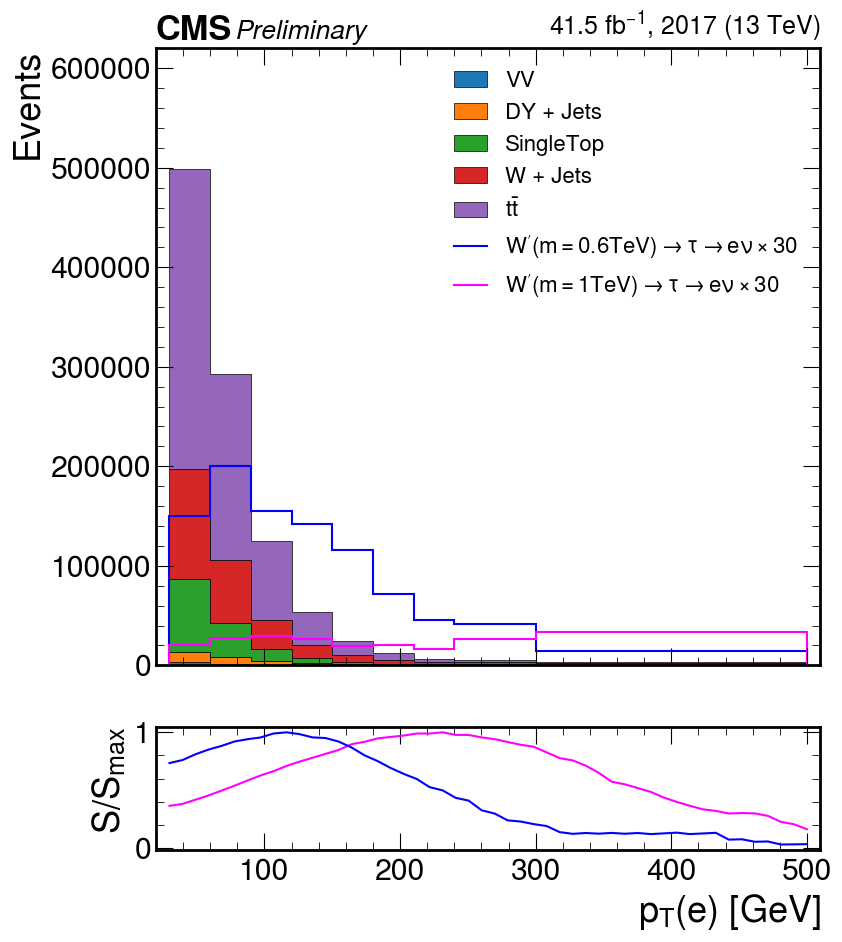

In [13]:
variable = 'electron_pt'
generate_histogram_variable(variable = variable,
                            factors = [30, 30],
                            ratio= True)
plt.savefig(f"Histogram_{variable}_{signal_tag}.png")

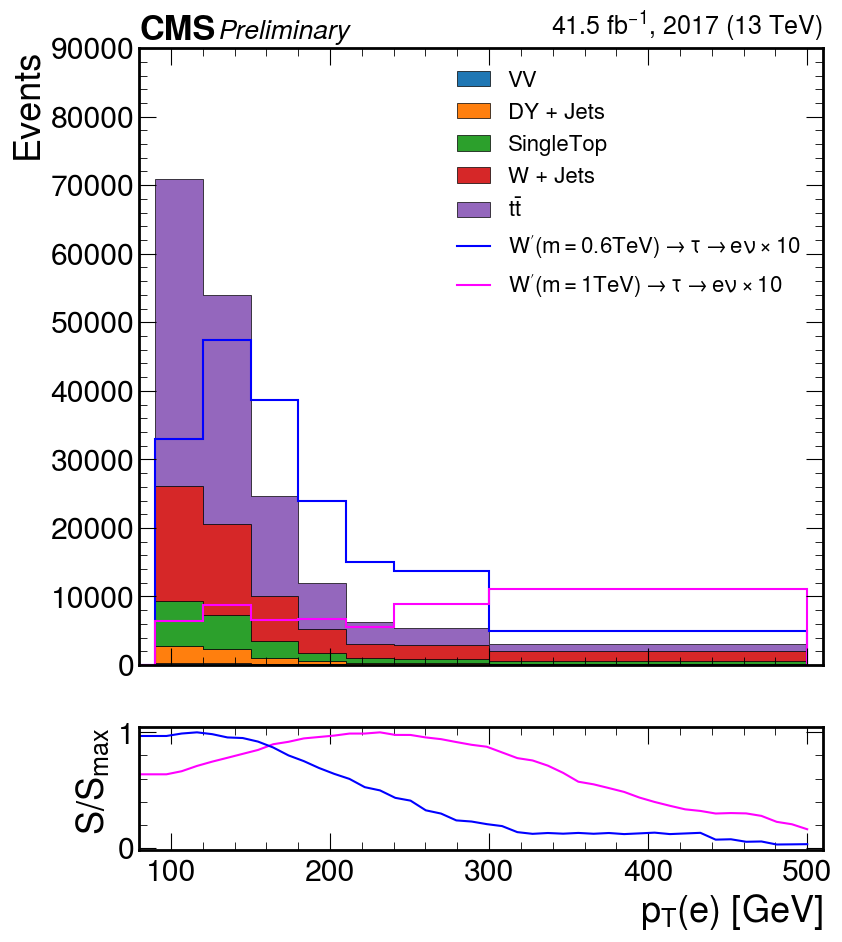

In [14]:
quer = 'electron_pt > 100' #+ '& dphi_e_met > 2' + ' & met > 150'

signal_1TeV_cut = signal_1TeV.copy().query(quer)
signal_600GeV_cut = signal_600GeV.copy().query(quer)
backgrounds_cut = {}
for background in backgrounds.keys():
    backgrounds_cut[background] = backgrounds[background].copy().query(quer)

generate_histogram_variable(variable = variable, 
                            factors = [10, 10],
                            signal_600 = signal_600GeV_cut,
                            signal_1000 = signal_1TeV_cut,
                            bkg_dict = backgrounds_cut,
                            cut = True,
                            ratio = True)
#plt.savefig(f"Histogram_{variable}_{signal_tag}_cut");

In [15]:
variable = 'dphi_e_met'
sig_1TeV = optimization(signal_data = signal_1TeV_cut,
                        backgrounds_data = backgrounds_cut,
                        weights = w,
                        variable = variable,
                        variable_range = [0, 3.1, 50],
                        signal_name = signal_name_1TeV)
sig_600GeV = optimization(signal_data = signal_600GeV_cut,
                          backgrounds_data = backgrounds_cut,
                          weights = w,
                          variable = variable,
                          variable_range = [0, 3.1, 50],
                          signal_name = signal_name_600GeV)

max_1TeV = max(list(sig_1TeV.values()))
for variable_value in sig_1TeV.keys():
    if sig_1TeV[variable_value] == max_1TeV:
        print(f"The value {variable_value} maximizes the significance for {variable} in the {signal_tag} channel when m(W') = 1TeV.")
        print(f"The significance value was {max_1TeV}")

max_600GeV = max(list(sig_600GeV.values()))
for variable_value in sig_600GeV.keys():
    if sig_600GeV[variable_value] == max_600GeV:
        print(f"The value {variable_value} maximizes the significance for {variable} in the {signal_tag} channel when m(W') = 600GeV.")
        print(f"The significance value was {max_600GeV}")

The value 1.7714285714285714 maximizes the significance for dphi_e_met in the tau channel when m(W') = 1TeV.
The significance value was 18.99881555965729
The value 2.024489795918367 maximizes the significance for dphi_e_met in the tau channel when m(W') = 600GeV.
The significance value was 56.223109836543955


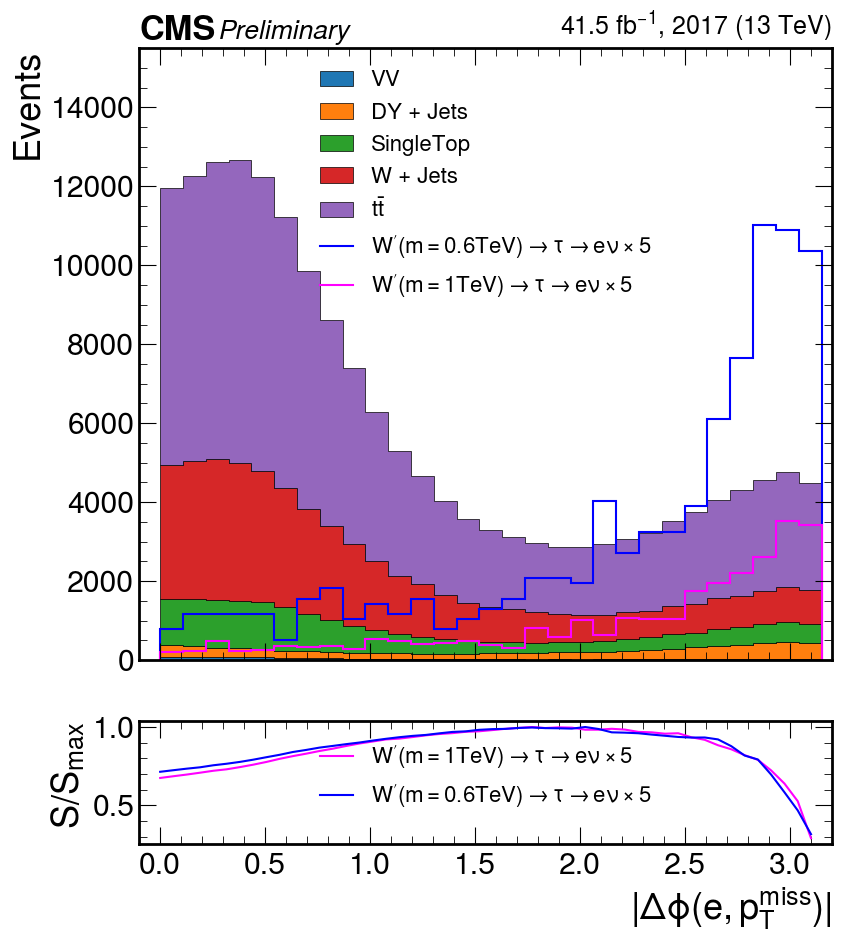

In [16]:
quer = 'electron_pt > 100' #+ '& dphi_e_met > 2'

signal_1TeV_cut = signal_1TeV.copy().query(quer)
signal_600GeV_cut = signal_600GeV.copy().query(quer)
backgrounds_cut = {}
for background in backgrounds.keys():
    backgrounds_cut[background] = backgrounds[background].copy().query(quer)

variable = 'dphi_e_met'
generate_histogram_variable(variable = variable, 
                            factors = [5, 5],
                            signal_600 = signal_600GeV_cut,
                            signal_1000 = signal_1TeV_cut,
                            bkg_dict = backgrounds_cut,
                            cut = True,
                            ratio = True)
plt.xlim(-0.1, 3.2)
plt.legend(loc = 'upper center', fontsize = 16)
plt.savefig(f"Histogram_{variable}_{signal_tag}_cut");

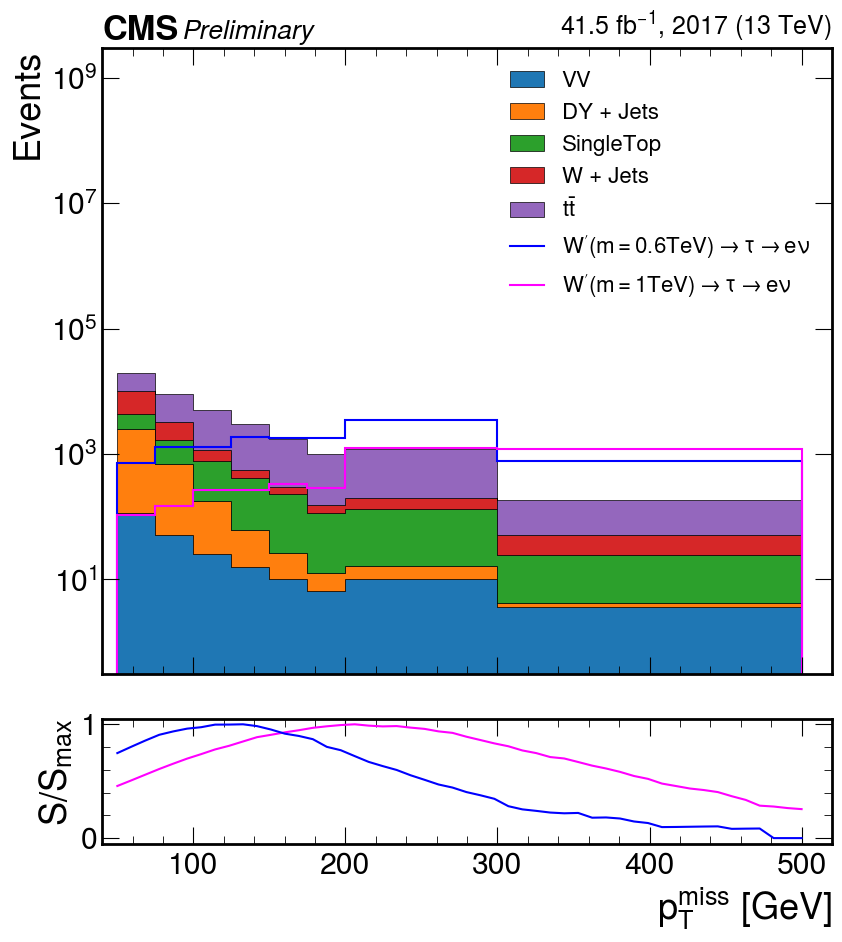

In [17]:
quer = 'electron_pt > 100' + '& dphi_e_met > 2' #+ ' & met > 150'

signal_1TeV_cut = signal_1TeV.copy().query(quer)
signal_600GeV_cut = signal_600GeV.copy().query(quer)
backgrounds_cut = {}
for background in backgrounds.keys():
    backgrounds_cut[background] = backgrounds[background].copy().query(quer)

variable = 'met'
generate_histogram_variable(variable = variable, 
                            factors = [1, 1],
                            signal_600 = signal_600GeV_cut,
                            signal_1000 = signal_1TeV_cut,
                            bkg_dict = backgrounds_cut,
                            cut = True,
                            ratio = True)
plt.xlim(40, 520)
plt.savefig(f"Histogram_{variable}_{signal_tag}_cut");

In [18]:
variable = 'met'
sig_1TeV = optimization(signal_data = signal_1TeV_cut,
                        backgrounds_data = backgrounds_cut,
                        weights = w,
                        variable = variable,
                        variable_range = [50, 500, 50],
                        signal_name = signal_name_1TeV)
sig_600GeV = optimization(signal_data = signal_600GeV_cut,
                          backgrounds_data = backgrounds_cut,
                          weights = w,
                          variable = variable,
                          variable_range = [50, 500, 50],
                          signal_name = signal_name_600GeV)

max_1TeV = max(list(sig_1TeV.values()))
for variable_value in sig_1TeV.keys():
    if sig_1TeV[variable_value] == max_1TeV:
        print(f"The value {variable_value} maximizes the significance for {variable} in the {signal_tag} channel when m(W') = 1TeV.")
        print(f"The significance value was {max_1TeV}")

max_600GeV = max(list(sig_600GeV.values()))
for variable_value in sig_600GeV.keys():
    if sig_600GeV[variable_value] == max_600GeV:
        print(f"The value {variable_value} maximizes the significance for {variable} in the {signal_tag} channel when m(W') = 600GeV.")
        print(f"The significance value was {max_600GeV}")

The value 206.12244897959187 maximizes the significance for met in the tau channel when m(W') = 1TeV.
The significance value was 41.01218730414678
The value 132.65306122448982 maximizes the significance for met in the tau channel when m(W') = 600GeV.
The significance value was 74.79803022188514


In [ ]:
quer = 'electron_pt > 100' + '& dphi_e_met > 2' + ' & met > 150'

signal_1TeV_cut = signal_1TeV.copy().query(quer)
signal_600GeV_cut = signal_600GeV.copy().query(quer)
backgrounds_cut = {}
for background in backgrounds.keys():
    backgrounds_cut[background] = backgrounds[background].copy().query(quer)

In [ ]:
signal_1TeV_cut["dphi_e_jet"] = signal_1TeV_cut.apply(an.DeltaPhi2, axis = 1, args = ('electron_phi', 'jet_phi'))
signal_600GeV_cut["dphi_e_jet"] = signal_600GeV_cut.apply(an.DeltaPhi2, axis = 1, args = ('electron_phi', 'jet_phi'))


for background in backgrounds_cut.keys():
    backgrounds_cut[background]["dphi_e_jet"] = backgrounds_cut[background].apply(an.DeltaPhi2, axis = 1, \
                                                                                  args = ('electron_phi', 'jet_phi'))

In [ ]:
signal_1TeV_cut.loc[:,'transverse_mass'] = an.transverse_mass(signal_1TeV_cut.electron_pt,
                                                              signal_1TeV_cut.met,
                                                              signal_1TeV_cut.dphi_e_met)
signal_600GeV_cut.loc[:,'transverse_mass'] = an.transverse_mass(signal_600GeV_cut.electron_pt,
                                                                signal_600GeV_cut.met,
                                                                signal_600GeV_cut.dphi_e_met)

for background in backgrounds_cut.keys():
    backgrounds_cut[background].loc[:,'transverse_mass'] = an.transverse_mass(backgrounds_cut[background].electron_pt,
                                                                              backgrounds_cut[background].met,
                                                                              backgrounds_cut[background].dphi_e_met)
    

In [ ]:
def m_Tot(row):  
    #Calculates TotalMass from 5.4  https://arxiv.org/pdf/1709.07242.pdf   
    pt1 = row['electron_pt']
    pt2 = row['jet_pt']
    met_pt3 = row['met']
    
    vec1 = vector.obj(pt = row[f'electron_pt'], eta = 0, phi = row[f'electron_phi'])
    vec2 = vector.obj(pt = row[f'jet_pt'], eta = 0, phi = row[f'jet_phi'])
    vec3 = vector.obj(pt = row[f'met'], eta = 0, phi = row[f'met_phi'])
    vect_t = vec1 + vec2 + vec3 
    vec_t2 = vect_t ** 2
    sum_escal = (pt1 + pt2 + met_pt3) **2
    return (sum_escal - vec_t2  ) ** 0.5

signal_1TeV_cut.loc[:,'total_mass'] = signal_1TeV_cut.apply(m_Tot, axis = 1)
signal_600GeV_cut.loc[:,'total_mass'] = signal_600GeV_cut.apply(m_Tot, axis = 1)

for background in backgrounds_cut.keys():
    backgrounds_cut[background].loc[:,'total_mass'] = backgrounds_cut[background].apply(m_Tot, axis = 1)



In [ ]:
signal_1TeV_cut.loc[:,'invariant_mass'] = an.invariant_mass(signal_1TeV_cut.electron_pt, 
                                                            signal_1TeV_cut.electron_eta, 
                                                            signal_1TeV_cut.jet_pt, 
                                                            signal_1TeV_cut.jet_eta, 
                                                            signal_1TeV_cut.dphi_e_jet )
signal_600GeV_cut.loc[:,'invariant_mass'] = an.invariant_mass(signal_600GeV_cut.electron_pt, 
                                                              signal_600GeV_cut.electron_eta, 
                                                              signal_600GeV_cut.jet_pt, 
                                                              signal_600GeV_cut.jet_eta, 
                                                              signal_600GeV_cut.dphi_e_jet )

for background in backgrounds_cut.keys():
    backgrounds_cut[background].loc[:,'invariant_mass'] = an.invariant_mass(backgrounds_cut[background].electron_pt, 
                                                                            backgrounds_cut[background].electron_eta, 
                                                                            backgrounds_cut[background].jet_pt, 
                                                                            backgrounds_cut[background].jet_eta, 
                                                                            backgrounds_cut[background].dphi_e_jet )



In [ ]:
variable = 'transverse_mass'
generate_histogram_variable(variable = variable,
                            factors = [1, 1],
                            signal_600 = signal_600GeV_cut,
                            signal_1000 = signal_1TeV_cut,
                            bkg_dict = backgrounds_cut,
                            cut = True)
plt.xlim(190, 1020)
plt.ylim(0.1, 1e9)
plt.yscale('log')
plt.legend(loc = 'upper left', fontsize = 16)
plt.savefig(f"Histogram_{variable}_{signal_tag}_cut");
#plt.xlabel = (r'$m_T(e, p_T^{miss})$')
#plt.savefig();

In [ ]:
variable = 'invariant_mass'
generate_histogram_variable(variable = variable,
                            factors = [1, 1],
                            signal_600 = signal_600GeV_cut,
                            signal_1000 = signal_1TeV_cut,
                            bkg_dict = backgrounds_cut,
                            cut = True)
#plt.xlim(80, 1020)
plt.xlim(80, 1020)
plt.ylim(0.1, 1e9)
plt.yscale('log')
plt.legend(loc = 'upper left', fontsize = 16)
plt.savefig(f"Histogram_{variable}_{signal_tag}_cut");

In [ ]:
variable = 'total_mass'
generate_histogram_variable(variable = variable,
                            factors = [1, 1],
                            signal_600 = signal_600GeV_cut,
                            signal_1000 = signal_1TeV_cut,
                            bkg_dict = backgrounds_cut,
                            cut = True)
plt.xlim(180, 1020)
plt.ylim(0.1, 1e9)
plt.yscale('log')
plt.legend(loc = 'upper left', fontsize = 16)
plt.savefig(f"Histogram_{variable}_{signal_tag}_cut");

In [ ]:
variable = 'met'
if variable == 'electron_pt':
    binning = [30, 60, 90, 120, 150, 180, 210, 240, 300, 500]
    histograma = {'DY + Jets': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
                  'SingleTop': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0]), 
                  '$t\\bar{t}$': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0]), 
                  'W + Jets': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
                  'VV': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])}
elif variable == 'dphi_e_met':
    binning = np.linspace(0, 3.15, 30)
    histograma = {'DY + Jets': np.zeros(29),
                  'SingleTop': np.zeros(29), 
                  '$t\\bar{t}$': np.zeros(29), 
                  'W + Jets': np.zeros(29),
                  'VV': np.zeros(29)}
elif variable == 'met':
    binning = [50, 75, 100, 125, 150, 175, 200, 300, 500]
    histograma = {'DY + Jets': np.zeros(8),
                  'SingleTop': np.zeros(8), 
                  '$t\\bar{t}$': np.zeros(8), 
                  'W + Jets': np.zeros(8),
                  'VV': np.zeros(8)}

    
for background in backgrounds.keys():
    hist, bins = np.histogram(backgrounds[background][variable], binning)
    type_bkg = backgrounds_info.loc[background, 'type']
    histograma[type_bkg] = histograma[type_bkg] + hist * backgrounds_info.loc[background,'weights']


if signal_tag == 'ele':
    signal_1TeV_counts = np.histogram(signal_1TeV[variable], binning)[0] * events.loc['SignalElectron_1TeV', 'weights']
    signal_600GeV_counts = np.histogram(signal_600GeV[variable], binning)[0] * events.loc['SignalElectron_1TeV', 'weights']
elif signal_tag == 'tau':
    signal_1TeV_counts = np.histogram(signal_1TeV[variable], binning)[0] * events.loc['Signal_tau_1tev', 'weights']
    signal_600GeV_counts = np.histogram(signal_600GeV[variable], binning)[0] * events.loc['Signal_tau_600gev', 'weights']

In [ ]:
np.sum(histograma['$t\\bar{t}$'])

In [ ]:
f, axs = plt.subplots( figsize=(9, 7), tight_layout = True)
hep.histplot([histograma[type] for type in histograma.keys()],
              bins = binning, 
              ax = axs,
              #color = ['c', 'm', 'y'],  
              stack = True, 
              histtype = 'fill', 
              label = [type for type in histograma.keys()],
              #sort='label_l')
              sort='yield',
              linewidth = 0.5,
              edgecolor = 'k')


#\tau \rightarrow
hep.histplot(signal_1TeV_counts * 30,
             bins = binning,
             ax = axs,
             label = r"$W'(m = 1TeV) \rightarrow \tau \rightarrow e \nu \times 30$")
hep.histplot(signal_600GeV_counts * 30,
             bins = binning,
             ax = axs,
             label = r"$W'(m = 0.6TeV) \rightarrow \tau \rightarrow e \nu \times 30$")


if variable == 'electron_pt':
    axs.set_xlabel('$p_T(e)$')
    axs.set_xlim(20, 510)
    axs.set_ylim(0, 6.2e5)
elif variable == 'dphi_e_met':
    axs.set_xlabel('$\Delta\phi(e, p_T^{miss})$')
    axs.set_xlim(-0.1, 3.2)
    axs.set_ylim(0, 1.3e5)
elif variable == 'met':
    axs.set_xlabel('$p_T^{miss}$')
    axs.set_xlim(20, 510)
    axs.set_ylim(0, 5.e5)

axs.set_ylabel('Events')

hep.cms.label(loc=0, label = 'Preliminary', data = True, fontsize = 19, lumi = 41.5, year = 2017)
plt.legend(loc = 'best', fontsize = 16);
plt.savefig(f"Histogram_{variable}_{signal_tag}.png")

In [ ]:
quer = 'electron_pt > 100' + '& dphi_e_met > 2' + ' & met > 150'

signal_1TeV_cut = signal_1TeV.query(quer)
signal_600GeV_cut = signal_600GeV.query(quer)
backgrounds_cut = {}
for background in backgrounds.keys():
    backgrounds_cut[background] = backgrounds[background].query(quer).copy()
#backgrounds_cut = background[background['electron_pt'] > an.get_max(sig_pt_ele)]

In [ ]:
variable = 'met'
if variable == 'electron_pt':
    binning = [30, 60, 90, 120, 150, 180, 210, 240, 300, 500]
    histograma = {'DY + Jets': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
                  'SingleTop': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0]), 
                  '$t\\bar{t}$': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0]), 
                  'W + Jets': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
                  'VV': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])}
elif variable == 'dphi_e_met':
    binning = np.linspace(0, 3.15, 30)
    histograma = {'DY + Jets': np.zeros(29),
                  'SingleTop': np.zeros(29), 
                  '$t\\bar{t}$': np.zeros(29), 
                  'W + Jets': np.zeros(29),
                  'VV': np.zeros(29)}
elif variable == 'met':
    binning = [50, 75, 100, 125, 150, 175, 200, 300, 500]
    histograma = {'DY + Jets': np.zeros(8),
                  'SingleTop': np.zeros(8), 
                  '$t\\bar{t}$': np.zeros(8), 
                  'W + Jets': np.zeros(8),
                  'VV': np.zeros(8)}




    
for background in backgrounds_cut.keys():
    hist, bins = np.histogram(backgrounds_cut[background][variable], binning)
    type_bkg = backgrounds_info.loc[background, 'type']
    histograma[type_bkg] = histograma[type_bkg] + hist * backgrounds_info.loc[background,'weights']


if signal_tag == 'ele':
    signal_1TeV_counts = np.histogram(signal_1TeV_cut[variable], binning)[0] * events.loc['SignalElectron_1TeV', 'weights']
    signal_600GeV_counts = np.histogram(signal_600GeV_cut[variable], binning)[0] * events.loc['SignalElectron_1TeV', 'weights']
elif signal_tag == 'tau':
    signal_1TeV_counts = np.histogram(signal_1TeV_cut[variable], binning)[0] * events.loc['Signal_tau_1tev', 'weights']
    signal_600GeV_counts = np.histogram(signal_600GeV_cut[variable], binning)[0] * events.loc['Signal_tau_600gev', 'weights']

In [ ]:
f, axs = plt.subplots( figsize=(9, 7))
hep.histplot([histograma[type] for type in histograma.keys()],
              bins = binning, 
              ax = axs,
              #color = ['c', 'm', 'y'],  
              stack = True, 
              histtype = 'fill', 
              label = [type for type in histograma.keys()],
              #sort='label_l')
              sort='yield',
              linewidth = 0.5,
              edgecolor = 'k')

#\tau \rightarrow
hep.histplot(signal_1TeV_counts ,
             bins = binning,
             ax = axs,
             label = r"$W'(m = 1TeV) \rightarrow \tau \rightarrow e \nu \times 50$")
hep.histplot(signal_600GeV_counts ,
             bins = binning,
             ax = axs,
             label = r"$W'(m = 0.6TeV) \rightarrow \tau \rightarrow e \nu \times 50$")


if variable == 'electron_pt':
    axs.set_xlabel('$p_T(e)$')
    axs.set_xlim(80, 510)
    axs.set_ylim(0, 0.9e5)
elif variable == 'dphi_e_met':
    axs.set_xlabel('$\Delta\phi(e, p_T^{miss})$')
    axs.set_xlim(1.9, 3.2)
    axs.set_ylim(0, 10.5e3)
elif variable == 'met':
    axs.set_xlabel('$p_T^{miss}$')
    axs.set_xlim(140, 510)
    axs.set_ylim(0.3, 1e9)
    axs.set_yscale('log')
axs.set_ylabel('upper left')
#axs.set_ylim(0, 1.1e4)

hep.cms.label(loc=0, label = 'Preliminary', data = True, fontsize = 19, lumi = 41.5, year = 2017)
plt.legend(loc = 'upper left', fontsize = 17)
plt.savefig(f"Histogram_{variable}_{signal_tag}_cut");

In [ ]:
signal_600GeV_cut.head()
plt.hist(signal_600GeV_cut.transverse_mass, bins = np.arange(100, 701, 50));

In [ ]:
dy  = {"DYJetsToLL_M-50_HT-100to200": backgrounds["DYJetsToLL_M-50_HT-100to200"],
         "DYJetsToLL_M-50_HT-1200to2500": backgrounds["DYJetsToLL_M-50_HT-1200to2500"],
         "DYJetsToLL_M-50_HT-2500toInf": backgrounds["DYJetsToLL_M-50_HT-2500toInf"],
         "DYJetsToLL_M-50_HT-400to600": backgrounds["DYJetsToLL_M-50_HT-400to600"],
         "DYJetsToLL_M-50_HT-600to800": backgrounds["DYJetsToLL_M-50_HT-600to800"],
         "DYJetsToLL_M-50_HT-800to1200": backgrounds["DYJetsToLL_M-50_HT-800to1200"],
         "DYJetsToLL_M-50_HT-200to400": backgrounds["DYJetsToLL_M-50_HT-200to400"]}
dy_cut = {}

selection = 'electron_pt > 190'

for background in dy.keys():
    dy_cut[background] = backgrounds[background].query(selection).copy()


#backgrounds['TTTo2L2Nu'].query(selection)

In [ ]:
s = 0
for background in dy.keys():
    s += dy_cut[background].shape[0] * backgrounds_info.loc[background,'weights']
    print(s)

In [ ]:
wpj   = {"WJetsToLNu_HT-100To200": backgrounds["WJetsToLNu_HT-100To200"],
         "WJetsToLNu_HT-200To400": backgrounds["WJetsToLNu_HT-200To400"],
         "WJetsToLNu_HT-400To600": backgrounds["WJetsToLNu_HT-400To600"],
         "WJetsToLNu_HT-600To800": backgrounds["WJetsToLNu_HT-600To800"],
         "WJetsToLNu_HT-800To1200": backgrounds["WJetsToLNu_HT-800To1200"],
         "WJetsToLNu_HT-1200To2500": backgrounds["WJetsToLNu_HT-1200To2500"],
         "WJetsToLNu_HT-2500ToInf": backgrounds["WJetsToLNu_HT-2500ToInf"]}
wpj_cut = {}

selection = 'electron_pt > 190 &\
             met > 160'

for background in wpj.keys():
    wpj_cut[background] = backgrounds[background].query(selection).copy()
 
#backgrounds['TTTo2L2Nu'].query(selection)

In [ ]:
s = 0
for background in wpj.keys():
    s += wpj_cut[background].shape[0] * backgrounds_info.loc[background,'weights']
    print(s)
    #print(wpj_cut[background].shape[0] * backgrounds_info.loc[background,'weights']) #= backgrounds[background].query(selection).copy()

In [ ]:
ttbar   = {"TTTo2L2Nu": backgrounds["TTTo2L2Nu"],
           "TTToHadronic": backgrounds["TTToHadronic"],
           "TTToSemiLeptonic": backgrounds["TTToSemiLeptonic"],
         }
ttbar_cut = ttbar.copy()


In [ ]:
s = 0
s_err = 0
for background in ttbar.keys():
    s += ttbar_cut[background].shape[0] * backgrounds_info.loc[background,'weights']
    s_err += np.sqrt(ttbar_cut[background].shape[0]) * backgrounds_info.loc[background,'weights']
    print(f"Number of events = {s} +/- {s_err}")